# MINI-EDA - ANÁLISE EXPLORATÓRIA DE FATURAMENTO

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", palette="muted")

In [8]:
# Substitua o caminho pelo local correto do seu arquivo
df = pd.read_excel("2A - Base de Dados - Exportações.xlsx")
print(df.shape)
print(df.head())
print(df.columns)

(2891, 11)
   Unnamed: 0  ID_Pedido Data_Pedido  ID_Representante Nome_Representante  \
0         NaN  #P1000001  2024-01-01              1004   Isabela Carolina   
1         NaN  #P1000002  2024-01-01              1004   Isabela Carolina   
2         NaN  #P1000003  2024-01-01              1004   Isabela Carolina   
3         NaN  #P1000004  2024-01-01              1004   Isabela Carolina   
4         NaN  #P1000005  2024-01-01              1004   Isabela Carolina   

  ID_Produto    Nome_Produto     Categoria  Quantidade_Vendida  \
0    SKU9005   Celular Mod 3     Celulares                  32   
1    SKU9005   Celular Mod 3     Celulares                  25   
2    SKU9011  Notebook Mod 3  Computadores                  40   
3    SKU9004   Celular Mod 2     Celulares                  41   
4    SKU9011  Notebook Mod 3  Computadores                  38   

   Preço_Unitário                       Localidade  
0            1800                  Alemanha/Europa  
1            1800      

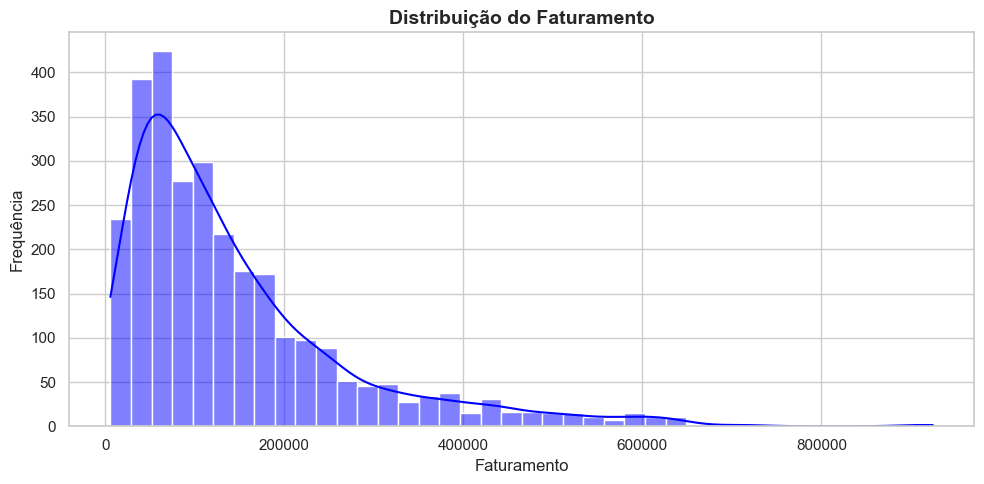

In [9]:
# 1. Distribuição do Faturamento
# -------------------------
df["Faturamento"] = df["Quantidade_Vendida"] * df["Preço_Unitário"]
plt.figure(figsize=(10,5))
sns.histplot(df["Faturamento"], bins=40, kde=True, color="blue")
plt.title("Distribuição do Faturamento", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

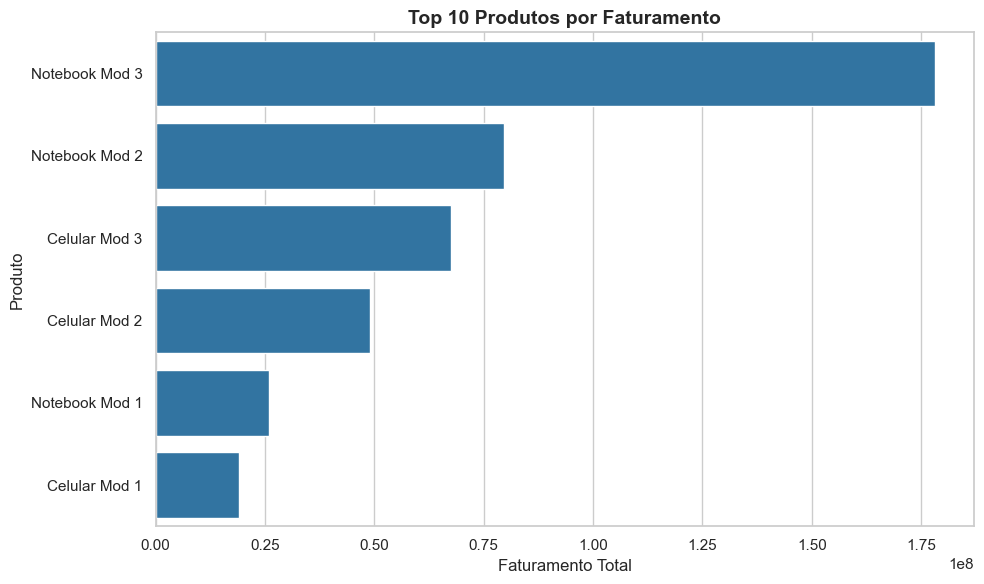

In [ ]:
# 2. Top 10 Produtos mais vendidos
# -------------------------
top_produtos = (
    df.groupby("Nome_Produto")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_produtos.values, y=top_produtos.index, color="tab:blue")
plt.title("Top 10 Produtos por Faturamento", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Total")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

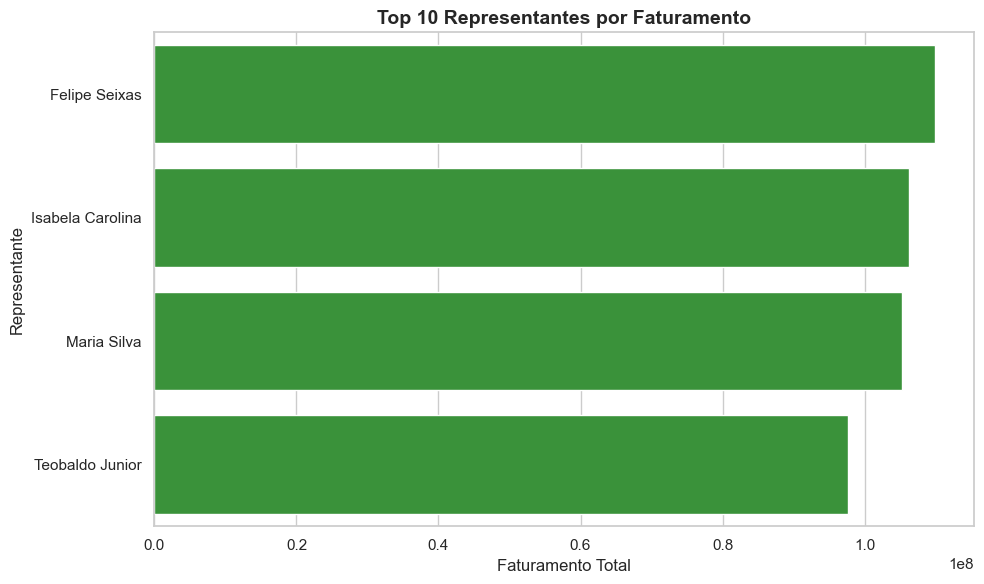

In [15]:
# 3. Top 10 Representantes por Faturamento
# -------------------------
top_reps = (
    df.groupby("Nome_Representante")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
# Para evitar o FutureWarning, não use palette se não houver hue
sns.barplot(x=top_reps.values, y=top_reps.index, color="tab:green")
plt.title("Top 10 Representantes por Faturamento", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Total")
plt.ylabel("Representante")
plt.tight_layout()
plt.show()

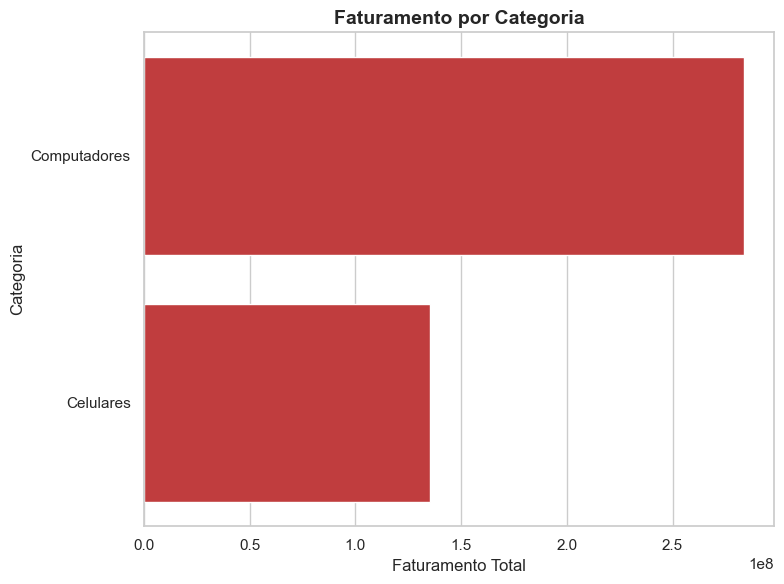

In [17]:
# 4. Faturamento por Categoria
# -------------------------
cat_faturamento = (
    df.groupby("Categoria")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,6))
# Para evitar o FutureWarning, não use palette se não houver hue
sns.barplot(x=cat_faturamento.values, y=cat_faturamento.index, color="tab:red")
plt.title("Faturamento por Categoria", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Total")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()

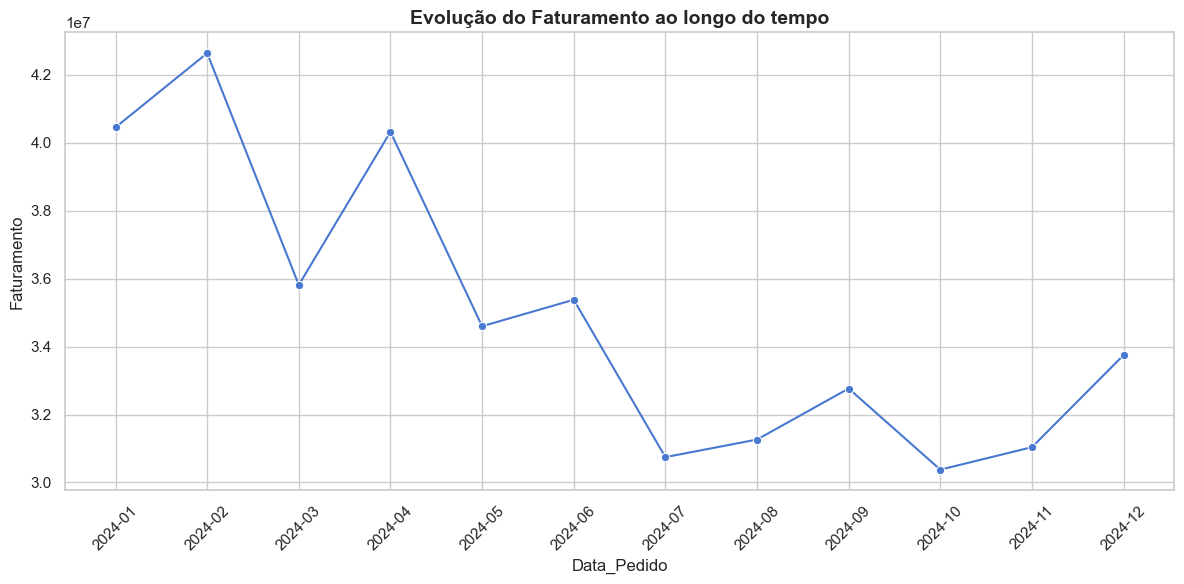

In [18]:
# 5. Evolução temporal (se Data_Pedido existir)
# -------------------------
if "Data_Pedido" in df.columns:
    df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], errors="coerce")
    evolucao = (
        df.groupby(df["Data_Pedido"].dt.to_period("M"))["Faturamento"]
        .sum()
        .reset_index()
    )
    evolucao["Data_Pedido"] = evolucao["Data_Pedido"].astype(str)

    plt.figure(figsize=(12,6))
    sns.lineplot(data=evolucao, x="Data_Pedido", y="Faturamento", marker="o")
    plt.title("Evolução do Faturamento ao longo do tempo", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()